## Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json

In [2]:
archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download the tsv file using the Requests library and the given URL
url =' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
        f.write(r.content)
predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []


for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])


## Assess

**ARCHIVE**

In [5]:
#there are some columns which does not have stage of dog
#first five column does not have any indicator for doggo, floofer, pupper, puppo
#4 columns are assigned as None.
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
#there are 2356 rows on table and there is not missing information for 
#tweet_id, text, numerator&denomerator,timestamp,kind of dogs and name
#But timestamp column is string, should be datetime
#id columns are float, should be integer.

archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
#There is not duplicated tweet id which is ok. Tweet id should be unique.
sum(archive['tweet_id'].duplicated())

0

In [8]:
#there is no duplicated text and duplicated tweet id.
sum(archive.text.duplicated())

0

In [9]:
#doggo (stage of dog) has 2 value: None and doggo. Which is ok.
archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [10]:
#Name column has missing information such as none or "a" which is not even a name
archive.name.sample(10)

139       Sammy
1672      Brody
1925       Earl
2246    Tedrick
1753       None
1278       Lucy
308         Eli
758        None
273       Pipsy
2121     Peanut
Name: name, dtype: object

In [11]:
#numerators and denominators have incorrect range.
#numerator should be between 0-10 and denominator should be 10 to make fair desicion
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
#there are 1976 columns which has None for all stage of dog.

archive.query('doggo=="None" & floofer=="None" & pupper=="None" & puppo=="None"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1976 non-null int64
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     1976 non-null object
source                        1976 non-null object
text                          1976 non-null object
retweeted_status_id           145 non-null float64
retweeted_status_user_id      145 non-null float64
retweeted_status_timestamp    145 non-null object
expanded_urls                 1923 non-null object
rating_numerator              1976 non-null int64
rating_denominator            1976 non-null int64
name                          1976 non-null object
doggo                         1976 non-null object
floofer                       1976 non-null object
pupper                        1976 non-null object
puppo                         1976 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#There are 181 retweets. Should be dropped.
archive['retweeted_status_id'].notnull().sum()

181

In [14]:
#only tweet_id is common for 3 tables
all_columns = pd.Series(list(archive) + list(predictions) + list(tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

**PREDICTIONS**

In [15]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
339,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,Chihuahua,0.718944,True,badger,0.178546,False,toy_terrier,0.037103,True
1725,820078625395449857,https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg,3,school_bus,0.999833,False,cab,0.000160,False,crane,0.000002,False
208,669970042633789440,https://pbs.twimg.com/media/CUw2MV4XIAAHLO_.jpg,1,miniature_pinscher,0.734744,True,Rottweiler,0.131066,True,Doberman,0.081509,True
1134,728653952833728512,https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg,2,window_shade,0.594333,False,studio_couch,0.053515,False,rotisserie,0.041248,False
518,676470639084101634,https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg,1,golden_retriever,0.790386,True,borzoi,0.022885,True,dingo,0.015343,False
1392,767122157629476866,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2,toy_poodle,0.873841,True,miniature_poodle,0.059192,True,Irish_terrier,0.035306,True
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,Yorkshire_terrier,0.430420,True,silky_terrier,0.196769,True,cairn,0.072676,True
1055,714258258790387713,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
870,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,washbasin,0.176423,False,paper_towel,0.167462,False,toilet_tissue,0.098029,False
342,672256522047614977,https://pbs.twimg.com/media/CVRVvRMWEAIBKOP.jpg,1,ostrich,0.999004,False,Arabian_camel,0.000512,False,llama,0.000147,False


In [17]:
sum(predictions.tweet_id.duplicated())

0

In [18]:
#There are 66 duplicated image.Interesting!
sum(predictions.jpg_url.duplicated())

66

In [19]:
predictions[predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [20]:
#There is only false or True for predictions results
predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [21]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
predictions[predictions['p1']=="tailed_frog"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
911,700796979434098688,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg,1,tailed_frog,0.652712,False,tree_frog,0.280212,False,bullfrog,0.040177,False


image of tailed_frog ticket is definetely a frog! 1. prediction is correct! But it is not a dog picture

In [23]:
#there is not any null prediction
sum(predictions.p3_conf.isnull())

0

Always 1 prediction is assigned as True at p1_dog,p2_dog,p3_dog columns.

**TWEETS**

In [24]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
tweet_id     2351 non-null object
retweets     2351 non-null int64
favorites    2351 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [25]:
tweets.sample(10)

,tweet_id,retweets,favorites
1072,739544079319588864,24147,43458
1801,676936541936185344,5481,13725
654,791672322847637504,3630,13069
751,778748913645780993,1547,7673
932,753298634498793472,6565,0
992,748324050481647620,865,4053
807,771136648247640064,3333,10170
406,823333489516937216,30,773
934,753039830821511168,23816,40851
1210,715009755312439296,1389,4526


In [26]:
sum(tweets.tweet_id.isnull())

0

In [27]:
sum(tweets.tweet_id.duplicated())

0

In [28]:
sum(tweets.retweets.isnull())

0

In [29]:
sum(tweets.favorites.isnull())

0

In [30]:
tweets.retweets.max()

79007

In [31]:
tweets.describe()

,retweets,favorites
count,2351.000000,2351.000000
mean,3131.396852,8111.893662
std,5238.522870,11989.498195
min,0.000000,0.000000
25%,617.000000,1419.000000
50%,1453.000000,3594.000000
75%,3622.500000,10115.500000
max,79007.000000,132170.000000


I am confused. Tweets info shows that retweets and favorites are integer but when I used describe function they are float!

#### Quality
##### `archieve` table

- Erroneous datatypes for timestamp(string->datetime)
- Erroneous datatypes in_reply_to_status_id(float->string)
- Erroneous datatypes in_reply_to_user_id(float->string)
- Erroneous datatypes retweeted_status_id(float->string)
- Erroneous datatypes retweeted_status_user_id(float->string) 
- Missing names or incorrect names at name column (a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such)
- Missing stage of dog indicator for 1976 columns
- stage of dog column type should be category
- Rating numeator is higher than denominator. Rating denominator is not standard.


##### `predictions` table
- There are 66 duplicated jpg url.
- _ or uppercase is used at p1,p2,p3 columns. 

##### `tweets` table
- tweet_id is string. Should be integer to have common variable on all table
- Retweets and favorites column should be integer


#### Tidiness
- Kind of dog has 4 columns: "doggo","floofer","pupper","puppo" should be under same column. (archieve)
- Retweeted tweets have same text and rates but diffirent tweet id. Deletion Retweets from table (archieve)
- p1,p2,p3 predictions should be 1 columns which states true one(predictions)
- Merge for archive, tweets and predictions on tweet_id



## Clean

In [32]:
archive_clean=archive.copy()
predictions_clean=predictions.copy()
tweets_clean=tweets.copy()

### Tidiness

**Define-1:** Stage of dogs should be one column on archive_clean

**COMMENT:** I did not want to use melt function. I created this algorithm at quizzes. It took couple minute to do below process by notebook. I am aware it is slow step.

In [33]:
archive_clean['dog_stage']=""
for i in range(2356):
    if archive_clean.doggo[i]=="doggo":
        archive_clean['dog_stage'][i]='doggo'
    elif archive_clean.floofer[i]=="floofer":
        archive_clean['dog_stage'][i]='floofer'
    elif archive_clean.pupper[i]=="pupper":
        archive_clean['dog_stage'][i]='pupper'
    elif archive_clean.puppo[i]=="puppo":
        archive_clean['dog_stage'][i]='puppo'   
    else:
        archive_clean['dog_stage'][i]='none' 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykern

**Test**

In [34]:
archive_clean[['doggo','floofer','puppo','pupper','dog_stage']].sample(10)

,doggo,floofer,puppo,pupper,dog_stage
816,None,None,None,None,none
2171,None,None,None,None,none
2327,None,None,None,None,none
349,None,None,None,None,none
2311,None,None,None,None,none
837,None,None,None,None,none
2342,None,None,None,None,none
69,None,None,None,None,none
1884,None,None,None,None,none
1954,None,None,None,pupper,pupper


In [35]:
#drop 'doggo','floofer','puppo','pupper'columns
archive_clean.drop(['doggo','floofer','puppo','pupper'], axis='columns', inplace=True)

**Define -2:** Retweeted tweets deletion from archive_clean

In [36]:
archive_clean=archive_clean[archive_clean.retweeted_status_user_id.isnull()]

**Test**

In [37]:
archive_clean.retweeted_status_user_id.notnull().sum()

0

**Define-3:** `tweets` and `archieve` and `predictions` table merge

In [38]:
tweets_clean.tweet_id=tweets_clean.tweet_id.astype(int)

combined1 = pd.merge(archive_clean, tweets_clean,
                        how = 'inner', on = 'tweet_id')
combined = pd.merge(combined1, predictions_clean,
                        how = 'inner', on = 'tweet_id')

Quality issue is solved here. tweets_id at tweets should be int.

**Test**

In [39]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
dog_stage                     1994 non-null object
retweets                      1994 non-null int64
favorites                     1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1994 non-n

**Define-4:** Created predictions column and filled with higest prediction

In [40]:
combined['predictions']=''
for i in range(1994):
    if combined.p1_conf[i]>combined.p2_conf[i] or combined.p1_conf[i]>combined.p3_conf[i]:
        combined['predictions'][i]=combined.p1[i]
    elif combined.p2_conf[i]>combined.p1_conf[i] or combined.p2_conf[i]>combined.p3_conf[i]:
        combined['predictions'][i]=combined.p2[i]
    else:
        combined['predictions'][i]=combined.p3[i]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Test:**

In [41]:
combined[['p1','p1_conf','p2','p2_conf','p3','p3_conf','predictions']].sample(10)

,p1,p1_conf,p2,p2_conf,p3,p3_conf,predictions
734,German_short-haired_pointer,0.742216,bluetick,0.152810,English_setter,0.051835,German_short-haired_pointer
23,Mexican_hairless,0.330741,sea_lion,0.275645,Weimaraner,0.134203,Mexican_hairless
1007,miniature_pinscher,0.890426,toy_terrier,0.051335,Chihuahua,0.018015,miniature_pinscher
342,ice_bear,0.336200,Samoyed,0.201358,Eskimo_dog,0.186789,ice_bear
966,French_bulldog,0.731405,Boston_bull,0.150672,pug,0.021811,French_bulldog
465,doormat,0.874431,French_bulldog,0.018759,Boston_bull,0.015134,doormat
955,Labrador_retriever,0.720481,whippet,0.048032,Chesapeake_Bay_retriever,0.045046,Labrador_retriever
1611,Chihuahua,0.541408,Italian_greyhound,0.156891,miniature_pinscher,0.069556,Chihuahua
567,beagle,0.571229,Chihuahua,0.175257,Pembroke,0.034306,beagle
875,soft-coated_wheaten_terrier,0.515919,Irish_terrier,0.162655,Chesapeake_Bay_retriever,0.125182,soft-coated_wheaten_terrier


In [42]:
combined.drop(['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], axis='columns', inplace=True)

### Quality

**1.** Erroneous datatype for Retweets and favorites.They should be int

**2-** Erroneous datatype for (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`). They should be string

**3-** Erroneous datatype for timestamp column (should be datetime)

**4-** State stage of dog column as category

In [43]:
combined.retweets = combined.retweets.astype(int)
combined.favorites = combined.favorites.astype(int)
combined.in_reply_to_status_id = combined.in_reply_to_status_id.astype(str)
combined.in_reply_to_user_id = combined.in_reply_to_user_id.astype(str)
combined.retweeted_status_id = combined.retweeted_status_id.astype(str)
combined.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)
combined.timestamp = pd.to_datetime(combined.timestamp)
combined.retweeted_status_timestamp = pd.to_datetime(combined.retweeted_status_timestamp)
combined.dog_stage=combined.dog_stage.astype('category')

**Test**

In [44]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 19 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null object
in_reply_to_user_id           1994 non-null object
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           1994 non-null object
retweeted_status_user_id      1815 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
dog_stage                     1994 non-null category
retweets                      1994 non-null int64
favorites                     1994 non-null int64
jpg_url                       1994 non-null object
img_num         

**5-** Missing or incorrect values for name column

Incorrect values -> 'my','such','the','an','just','one','very','quite','actually','mad','space','infuriating','all','oficially','0','old','life','unacceptable','incredibly','by','his', 'a'

Missing value -> None

In [45]:
combined.text[combined.name =='a']

49      Here is a pupper approaching maximum borkdrive...
472     Here is a perfect example of someone who has t...
582     Guys this is getting so out of hand. We only r...
746     This is a mighty rare blue-tailed hammer sherk...
748     Viewer discretion is advised. This is a terrib...
757     This is a carrot. We only rate dogs. Please on...
783     This is a very rare Great Alaskan Bush Pupper....
919     People please. This is a Deadly Mediterranean ...
929     This is a taco. We only rate dogs. Please only...
1045    Here is a heartbreaking scene of an incredible...
1054    Here is a whole flock of puppers.  60/50 I'll ...
1064    This is a Butternut Cumberfloof. It's not wind...
1070    This is a Wild Tuscan Poofwiggle. Careful not ...
1082    "Pupper is a present to world. Here is a bow f...
1185    This is a rare Arctic Wubberfloof. Unamused by...
1398    Guys this really needs to stop. We've been ove...
1441    This is a dog swinging. I really enjoyed it so...
1503    This i

I found below names by checking all columns one by one. But I noticed that every column included ".. named .." phrases. It would have been easier to search "named" in column.

929 - taco ,757 - carrot ,1064 - Butternut Cumberfloof,1949 - Octaviath,1942 - Pepe,1912 - Kohl,1890 - Cheryl,1876 - Alfonso,1859 - Chuck,1833 - Leroi,1804 - Alfredo,1790 - Alphred,1772 - Hemry,1769 - Cherokee,1760 - Spork,1710 - Rufus,1679 - Jacob,1833 - Kip,1503 - Wylie,1896 - Jessiga,1903 - Klint

In [46]:
combined.name[929] = 'Taco'
combined.name[757] = 'Carrot'
combined.name[1064] = 'Butternut Cumberfloof'
combined.name[1949] = 'Octaviath'
combined.name[1942] = 'Pepe'
combined.name[1912] = 'Kohl'
combined.name[1903] = 'Klint'
combined.name[1896] = 'Jesiga'
combined.name[1890] = 'Cheryl'
combined.name[1859] = 'Chuck'
combined.name[1876] = 'Alfonso'
combined.name[1804] = 'Alfredo'
combined.name[1833] = 'Leroi'
combined.name[1679] = 'Jacob'
combined.name[1790] = 'Alphred'
combined.name[1772] = 'Hemry'
combined.name[1769] = 'Cherokee'
combined.name[1760] = 'Spork'
combined.name[1710] = 'Rufus'
combined.name[1833] = 'Kip'
combined.name[1503] = 'Wylie'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-p

In [47]:
#other meaningless names
list = ['my','such','the','an','just','one','very','quite','actually','mad','space','infuriating','all','oficially','0','old','life','unacceptable','incredibly','by','his']
combined.query('name in list').text.str.contains('name').sort_values()

21      False
1209    False
1275    False
1356    False
1386    False
1452    False
1469    False
1150    False
1582    False
1675    False
1682    False
1964    False
1971    False
1973    False
1983    False
1664    False
1984    False
1085    False
973     False
135     False
149     False
275     False
404     False
596     False
1065    False
738     False
681     False
762     False
768     False
795     False
826     False
849     False
866     False
739     False
1987    False
622      True
1846     True
Name: text, dtype: bool

In [48]:
#name is Zoey
combined.text[622]

"This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB"

In [49]:
#name is Berta
combined.text[1846]

'This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg'

In [50]:
combined.name[622] = 'Zoey'
combined.name[1846] = 'Berta'
#this one does not include "name" phrases in text column, I found it visually
combined.name[738] = 'Quizno'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [51]:
#list missing name column but include "name" phrases in text column
combined.query('name=="None"').text.str.contains('name').sort_values()

5       False
1477    False
1475    False
1474    False
1470    False
1468    False
1467    False
1465    False
1464    False
1462    False
1461    False
1460    False
1459    False
1456    False
1454    False
1447    False
1445    False
1444    False
1443    False
1440    False
1439    False
1438    False
1435    False
1434    False
1433    False
1430    False
1428    False
1425    False
1424    False
1421    False
        ...  
839     False
902     False
897     False
955     False
891     False
961     False
882     False
962     False
877     False
872     False
871     False
870     False
869     False
860     False
858     False
855     False
844     False
841     False
944     False
946     False
1395     True
1906     True
1730     True
1342     True
119      True
1944     True
1868     True
134      True
1809     True
1908     True
Name: text, Length: 546, dtype: bool

In [52]:
combined.text[1395]

"This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP"

In [53]:
combined.text[1906]

'Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm'

In [54]:
combined.text[1730]

"I would do radical things in the name of Dog God. I'd believe every word in that book. 10/10 https://t.co/9ZuGAmLZDR"

In [55]:
combined.text[1342]

"We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT"

In [56]:
combined.text[119]

'Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen'

In [57]:
combined.text[1944]

'These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1'

In [58]:
combined.text[1868]

'Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert https://t.co/aeZykWwiJN'

In [59]:
combined.text[134]

"Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0"

In [60]:
combined.text[1809]

'Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m'

In [61]:
combined.text[1908]

'This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7'

Found more names:

35-Howard,149-Pablo,157-Boomer,168-Zoey,603-Tickles,843-Charley,1678-Thea,1734-Sabertooth,2166-Zeus,2227-Guss,2267-Big Jumpy Rat,2306-Cupit and Prencer

In [62]:
combined.name[1395]="Sabertooth"
combined.name[1906]="Big Jumpy Rat"
combined.name[1342]='Thea'
combined.name[119]='Pablo'
combined.name[1944]='Cupit and Prencer'
combined.name[1868]='Guss'
combined.name[134]='Zoey'
combined.name[1809]='Zeus'
combined.name[1908]='Tickles'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-p

In [63]:
list = ['my','such','the','an','just','one','very','quite','actually','mad','space','infuriating','all','oficially','0','old','life','unacceptable','incredibly','by','his']
combined["name"] = combined["name"].apply(lambda x: x.replace('the', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('such', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('quite', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('one', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('an', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('just', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('space', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('very', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('incredibly', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('his', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('all', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('unacceptable', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('infuriating', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('actually', 'None'))
combined["name"] = combined["name"].apply(lambda x: x.replace('by', 'None'))


**Test**

In [64]:
combined.name[1362]    

'NNone'

In [65]:
combined.name[1395]

'Sabertooth'

In [66]:
combined.query('name in list')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites,jpg_url,img_num,predictions


**5-** Uppercases are used at p1,p2,p3 columns on predictions table.
These are assigned to predictions column. Hence predictions column will be fixed below

In [67]:
combined.predictions =combined.predictions.str.lower()


**Test**

In [68]:
combined.predictions.sample(10)

1516                      borzoi
490                     malamute
1418                   seat_belt
1803                   chihuahua
1289                       llama
631                      samoyed
845                  tennis_ball
1503            english_springer
1635    chesapeake_bay_retriever
239          rhodesian_ridgeback
Name: predictions, dtype: object

**6-**Rating numerator is higher than denominator. Denominator should be 10, numerator should be equal or less than 10

In [69]:
combined['result']=combined['rating_numerator']/combined['rating_denominator']

In [70]:
combined['rating_numerator'][combined['result']>1]=10
combined['rating_denominator'][combined['result']>1]=10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
a=combined.query('rating_denominator !=10')
a[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
800,9,11
891,4,20
925,50,50
970,80,80
988,45,50
1328,7,11
1973,1,2


In [72]:
combined.rating_numerator[800]=8
combined.rating_denominator[800]=10

combined.rating_numerator[891]=2
combined.rating_denominator[891]=10

combined.rating_numerator[925]=10
combined.rating_denominator[925]=10

combined.rating_numerator[970]=10
combined.rating_denominator[970]=10

combined.rating_numerator[988]=9
combined.rating_denominator[988]=10

combined.rating_numerator[1328]=6
combined.rating_denominator[1328]=10

combined.rating_numerator[1973]=5
combined.rating_denominator[1973]=10


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWi

**Test**

In [73]:
combined.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites,jpg_url,img_num,predictions,result


In [74]:
combined.query('rating_numerator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites,jpg_url,img_num,predictions,result


In [75]:
combined[['rating_numerator','rating_denominator']].sample(10)

,rating_numerator,rating_denominator
1902,10,10
1293,10,10
781,10,10
660,10,10
100,10,10
584,10,10
118,10,10
304,10,10
1839,10,10
274,10,10


In [76]:
combined.drop(['result'], axis='columns', inplace=True)

In [77]:
combined['rating']=combined['rating_numerator']/combined['rating_denominator']

In [78]:
combined['rating'].sample(10)

439     1.0
1737    0.7
1209    0.9
1245    1.0
917     1.0
1716    0.8
1856    1.0
270     1.0
1071    1.0
172     1.0
Name: rating, dtype: float64

**7-** There are duplicated jpg url on predictions table

In [79]:
sum(combined.jpg_url.duplicated())

0

**COMMENT**
After merged, duplicated jpg_urls are dropped

**8-** Delete "_" at predictions column

In [80]:
combined.predictions=combined.predictions.str.replace('_',' ')

**Test**

In [81]:
combined.predictions.sample(10)

1963                    toy terrier
1377                         bubble
237                  border terrier
1761                      chihuahua
1007             miniature pinscher
639              norwegian elkhound
1145    soft-coated wheaten terrier
1861                standard poodle
1739                norfolk terrier
1948                          snail
Name: predictions, dtype: object

**9-** Check if text includes doggo,pupper,puppo,floofer but not filled at stage_dog column

In [82]:
combined.dog_stage.value_counts()

none       1688
pupper      203
doggo        74
puppo        22
floofer       7
Name: dog_stage, dtype: int64

In [83]:
empty_stage=combined[combined['dog_stage']=="none"]

In [84]:
empty_stage[empty_stage['text'].str.contains('puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites,jpg_url,img_num,predictions,rating
71,876120275196170240,nan,nan,2017-06-17 16:52:05,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",nan,nan,NaT,https://twitter.com/dog_rates/status/876120275...,10,10,Venti,none,4864,28365,https://pbs.twimg.com/media/DCiavj_UwAAcXep.jpg,1,bernese mountain dog,1.0
87,871879754684805121,nan,nan,2017-06-06 00:01:46,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,nan,nan,NaT,https://twitter.com/dog_rates/status/871879754...,10,10,Lassie,none,11785,38940,https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg,1,shetland sheepdog,1.0
107,866686824827068416,nan,nan,2017-05-22 16:06:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,nan,nan,NaT,https://twitter.com/dog_rates/status/866686824...,10,10,Lili,none,3702,19979,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,1,flat-coated retriever,1.0
223,837366284874571778,nan,nan,2017-03-02 18:17:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,nan,nan,NaT,https://twitter.com/dog_rates/status/837366284...,10,10,Lucy,none,5959,22929,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1,american staffordshire terrier,1.0
406,805826884734976000,nan,nan,2016-12-05 17:31:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He is not a fan of the pupporazz...,nan,NaN,NaT,https://twitter.com/dog_rates/status/805826884...,10,10,Duke,none,2122,7301,https://pbs.twimg.com/ext_tw_video_thumb/80582...,1,siberian husky,1.0


In [85]:
#people did puns at their tweets. But when I checked pictures, they were really puppo!
combined.dog_stage[71]='puppo'
combined.dog_stage[87]='puppo'
combined.dog_stage[107]='puppo'
combined.dog_stage[223]='puppo'
combined.dog_stage[406]='puppo'

In [86]:
empty_stage[empty_stage['text'].str.contains('doggo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites,jpg_url,img_num,predictions,rating
206,841439858740625411,nan,nan,2017-03-14 00:04:30,"<a href=""http://twitter.com/download/iphone"" r...",Here we have some incredible doggos for #K9Vet...,nan,nan,NaT,https://twitter.com/dog_rates/status/841439858...,10,10,NNone,none,4134,13692,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,3,military uniform,1.0
352,815990720817401858,nan,nan,2017-01-02 18:38:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,nan,nan,NaT,https://www.gofundme.com/surgeryforjacktheminp...,10,10,Jack,none,1200,5520,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,1,chihuahua,1.0
580,772877495989305348,nan,nan,2016-09-05 19:22:09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",You need to watch these two doggos argue throu...,nan,nan,NaT,https://twitter.com/dog_rates/status/772877495...,10,10,NNone,none,4452,9501,https://pbs.twimg.com/ext_tw_video_thumb/77287...,1,tabby,1.0
690,753420520834629632,nan,nan,2016-07-14 02:47:04,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing an isolated squad of bo...,nan,nan,NaT,https://twitter.com/dog_rates/status/753420520...,10,10,NNone,none,4039,8676,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,balloon,1.0
733,749036806121881602,nan,nan,2016-07-02 00:27:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,nan,nan,NaT,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,none,893,3409,https://pbs.twimg.com/media/CmUciKgWIAA97sH.jpg,1,sulphur-crested cockatoo,0.8
848,731156023742988288,nan,nan,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,nan,nan,NaT,https://twitter.com/dog_rates/status/731156023...,10,10,tNone,none,1424,4171,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,1.0


In [87]:
#these are doggo yet not signed as doggo.
combined.dog_stage[206]='doggo'
combined.dog_stage[352]='doggo'
combined.dog_stage[580]='doggo'
combined.dog_stage[690]='doggo'
combined.dog_stage[733]='doggo'
combined.dog_stage[848]='doggo'


In [88]:
empty_stage[empty_stage['text'].str.contains('pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites,jpg_url,img_num,predictions,rating
48,881666595344535552,nan,nan,2017-07-03 00:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,nan,nan,NaT,https://twitter.com/dog_rates/status/881666595...,10,10,Gary,none,11013,51333,https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg,1,saluki,1.0
739,748575535303884801,nan,nan,2016-06-30 17:54:50,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most reckless puppers I've ...,nan,nan,NaT,https://twitter.com/dog_rates/status/748575535...,6,10,None,none,2254,6654,https://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg,1,muzzle,0.6
764,746056683365994496,nan,nan,2016-06-23 19:05:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlen and Thumpelina. They are best pa...,nan,NaN,NaT,https://twitter.com/dog_rates/status/746056683...,10,10,Arlen,none,927,3876,https://pbs.twimg.com/media/ClqGl7fXIAA8nDe.jpg,1,shetland sheepdog,1.0
823,737310737551491075,nan,nan,2016-05-30 15:52:33,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and watch the...,nan,nan,NaT,https://twitter.com/dog_rates/status/737310737...,10,10,NNone,none,8289,15970,https://pbs.twimg.com/ext_tw_video_thumb/73731...,1,cliff,1.0
940,714606013974974464,nan,nan,2016-03-29 00:12:05,"<a href=""http://twitter.com/download/iphone"" r...",Here are two lil cuddly puppers. Both 12/10 wo...,nan,nan,NaT,https://twitter.com/dog_rates/status/714606013...,10,10,NNone,none,1034,3919,https://pbs.twimg.com/media/CerKYG8WAAM1aE-.jpg,1,norfolk terrier,1.0
946,713900603437621249,nan,nan,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,nan,nan,NaT,https://twitter.com/dog_rates/status/713900603...,10,10,NNone,none,826,3044,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden retriever,1.0
970,710658690886586372,nan,nan,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,nan,nan,NaT,https://twitter.com/dog_rates/status/710658690...,10,10,NNone,none,632,2512,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated wheaten terrier,1.0
979,709901256215666688,nan,nan,2016-03-16 00:37:03,"<a href=""http://twitter.com/download/iphone"" r...",WeRateDogs stickers are here and they're 12/10...,nan,nan,NaT,"http://goo.gl/ArWZfi,https://twitter.com/dog_r...",10,10,NNone,none,110,728,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,2,bib,1.0
1054,704054845121142784,nan,nan,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,nan,nan,NaT,https://twitter.com/dog_rates/status/704054845...,10,10,a,none,1022,3188,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,great pyrenees,1.0
1199,690959652130045952,nan,nan,2016-01-23 18:09:53,"<a href=""http://twitter.com/download/iphone"" r...",This golden is happy to refute the soft mouth ...,nan,nan,NaT,https://twitter.com/dog_rates/status/690959652...,10,10,NNone,none,1413,3895,https://pbs.twimg.com/media/CZbIIM-WkAIPClg.jpg,2,golden retriever,1.0


In [89]:
combined.dog_stage[48]='pupper'
combined.dog_stage[739]='pupper'
combined.dog_stage[764]='pupper'
combined.dog_stage[823]='pupper'
combined.dog_stage[940]='pupper'
combined.dog_stage[946]='pupper'
combined.dog_stage[970]='pupper'
combined.dog_stage[979]='pupper'
combined.dog_stage[1054]='pupper'
combined.dog_stage[1199]='pupper'
combined.dog_stage[1302]='pupper'
combined.dog_stage[1303]='pupper'
combined.dog_stage[1304]='pupper'
combined.dog_stage[1310]='pupper'
combined.dog_stage[1372]='pupper'
combined.dog_stage[1374]='pupper'
combined.dog_stage[1478]='pupper'
combined.dog_stage[1494]='pupper'
combined.dog_stage[1497]='pupper'
combined.dog_stage[1512]='pupper'
combined.dog_stage[1549]='pupper'
combined.dog_stage[1574]='pupper'
combined.dog_stage[1785]='pupper'

In [90]:
empty_stage[empty_stage['text'].str.contains('floof')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites,jpg_url,img_num,predictions,rating
24,887101392804085760,nan,nan,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,nan,nan,NaT,https://twitter.com/dog_rates/status/887101392...,10,10,NNone,none,6132,31016,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,1,samoyed,1.0
47,881906580714921986,nan,nan,2017-07-03 16:04:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,nan,nan,NaT,https://twitter.com/dog_rates/status/881906580...,10,10,Rey,none,3512,24680,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,weimaraner,1.0
323,820690176645140481,nan,nan,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,nan,nan,NaT,https://twitter.com/dog_rates/status/820690176...,10,10,NNone,none,3694,13461,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,west highland white terrier,1.0
448,796080075804475393,nan,nan,2016-11-08 20:00:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,nan,nan,NaT,https://twitter.com/dog_rates/status/796080075...,10,10,Yogi,none,2686,9427,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,1.0
454,794332329137291264,nan,nan,2016-11-04 00:15:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,nan,nan,NaT,https://twitter.com/dog_rates/status/794332329...,10,10,Nimbus,none,3071,10641,https://pbs.twimg.com/media/CwYJBiHXgAQlvrh.jpg,1,samoyed,1.0
538,780543529827336192,nan,nan,2016-09-26 23:04:13,"<a href=""http://twitter.com/download/iphone"" r...",Here's a perturbed super floof. 12/10 would sn...,nan,NaN,NaT,https://twitter.com/dog_rates/status/780543529...,10,10,NNone,none,2005,6995,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,1,golden retriever,1.0
573,773922284943896577,nan,nan,2016-09-08 16:33:46,"<a href=""http://twitter.com/download/iphone"" r...","This is Heinrich (pronounced ""Pat""). He's a Bo...",nan,nan,NaT,https://twitter.com/dog_rates/status/773922284...,10,10,Heinrich,none,1977,7067,https://pbs.twimg.com/media/Cr2GNdlW8AAbojw.jpg,1,pomeranian,1.0
707,751251247299190784,nan,nan,2016-07-08 03:07:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Gilbert. He's being chased by a battal...,nan,nan,NaT,https://twitter.com/dog_rates/status/751251247...,10,10,Gilbert,none,6650,13701,https://pbs.twimg.com/ext_tw_video_thumb/75125...,1,walker hound,1.0
745,747933425676525569,nan,nan,2016-06-28 23:23:19,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,nan,NaN,NaT,https://twitter.com/dog_rates/status/747933425...,10,10,NNone,none,2878,7264,https://pbs.twimg.com/media/CmExV2qWkAAn_pN.jpg,1,samoyed,1.0
887,723912936180330496,nan,nan,2016-04-23 16:34:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Sugar. She's a Bolivian Superfloof. Sp...,nan,nan,NaT,https://twitter.com/dog_rates/status/723912936...,10,10,Sugar,none,1364,4216,https://pbs.twimg.com/media/Cgva-QqUUAA7Hv9.jpg,1,samoyed,1.0


In [91]:
combined.dog_stage[24]='floofer'
combined.dog_stage[47]='floofer'
combined.dog_stage[323]='floofer'
combined.dog_stage[448]='floofer'
combined.dog_stage[454]='floofer'
combined.dog_stage[538]='floofer'
combined.dog_stage[573]='floofer'
combined.dog_stage[707]='floofer'
combined.dog_stage[745]='floofer'
combined.dog_stage[887]='floofer'
combined.dog_stage[891]='floofer'
combined.dog_stage[982]='floofer'
combined.dog_stage[1064]='floofer'
combined.dog_stage[1074]='floofer'
combined.dog_stage[1161]='floofer'
combined.dog_stage[1185]='floofer'
combined.dog_stage[1202]='floofer'
combined.dog_stage[1219]='floofer'
combined.dog_stage[1270]='floofer'


In [92]:
combined.dog_stage.value_counts()

none       1635
pupper      226
doggo        80
puppo        27
floofer      26
Name: dog_stage, dtype: int64

## Store Data

In [93]:
combined.to_csv('twitter_archive_master.csv')

## Analyze

In [94]:
import matplotlib.pyplot as plt

In [95]:
#most favorited dog is 309, less favorited dog is 81
combined.favorites.sort_values()

1977        81
1957       107
1975       108
1989       111
1965       113
1984       118
1980       120
1991       128
1963       129
1958       131
1992       132
1988       136
1973       152
1982       154
1978       160
1979       166
1961       171
1959       171
1966       171
1937       173
1974       184
1967       194
1953       195
1939       197
1926       200
1913       202
1971       203
1919       209
1852       210
1903       218
         ...  
411      49544
1932     49563
332      49739
49       50268
48       51333
109      54422
637      54689
100      54852
450      55426
297      56152
339      57290
272      57984
1424     62090
7        66632
1482     66739
22       69919
265      73069
810      74777
124      77733
33       78855
65       81406
402      83529
93       84646
135      94104
333      95062
108     106418
400     106528
58      107664
775     130416
309     132170
Name: favorites, Length: 1994, dtype: int64

In [96]:
#most retweeted dog is 775, less retweeted dog is 1977
combined.retweets.sort_values()

1977       15
1957       23
1865       34
1975       37
1989       41
1965       43
1852       45
1747       45
1991       47
1980       47
1992       48
1963       48
1937       50
1953       51
1958       52
1939       53
1959       54
1938       57
1926       58
1882       59
1919       60
1988       60
1896       61
1803       61
1984       61
1834       62
1854       62
1790       62
1787       65
1913       66
        ...  
22      18746
411     18761
1328    18850
1515    18862
148     19078
33      19110
265     19159
7       19515
297     19539
65      19896
962     20364
1403    21151
332     21667
808     24147
124     24962
93      27457
450     27562
1424    30748
339     31086
1482    31755
135     32548
108     32665
637     33180
402     40509
333     41998
58      45587
309     47891
810     52010
400     56291
775     79007
Name: retweets, Length: 1994, dtype: int64

In [97]:
#most retweeted rating
combined.predictions[775]

'labrador retriever'

In [98]:
#most favorated rating
combined.rating[309]

1.0

In [99]:
#less favorited rating
combined.rating[81]

1.0

In [100]:
#less retweeted rating
combined.rating[1977]

1.0

In [101]:
combined.describe()

,tweet_id,rating_numerator,rating_denominator,retweets,favorites,img_num,rating
count,1.994000e+03,1994.000000,1994.0,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,9.419759,10.0,2766.333501,8917.454363,1.203109,0.941976
std,6.747816e+16,1.474939,0.0,4710.236670,12394.178827,0.560777,0.147494
min,6.660209e+17,0.000000,10.0,15.000000,81.000000,1.000000,0.000000
25%,6.758475e+17,10.000000,10.0,621.250000,1965.000000,1.000000,1.000000
50%,7.084748e+17,10.000000,10.0,1346.500000,4112.000000,1.000000,1.000000
75%,7.877873e+17,10.000000,10.0,3195.750000,11270.000000,1.000000,1.000000
max,8.924206e+17,10.000000,10.0,79007.000000,132170.000000,4.000000,1.000000


Text(0,0.5,'Count')

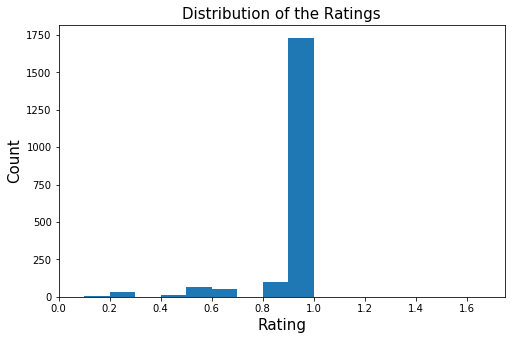

In [102]:
combined.rating.plot(kind='hist', xlim=[0,1.75], figsize=(8,5))
plt.title('Distribution of the Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)


Text(0,0.5,'Count')

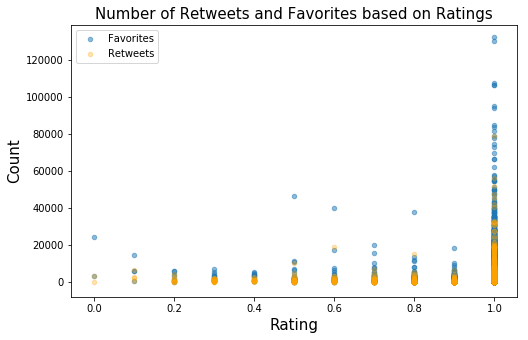

In [103]:
ax = combined.plot.scatter(x='rating', y='favorites', alpha=0.5, label='Favorites');
combined.plot.scatter(x='rating', y='retweets', color='Orange', alpha=0.3, label='Retweets', ax=ax, figsize=(8,5));
plt.title('Number of Retweets and Favorites based on Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)


Text(0,0.5,'Count')

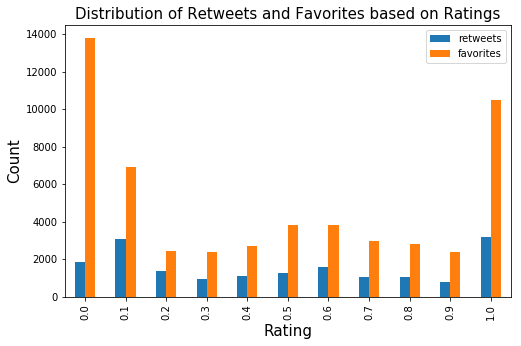

In [104]:
combined.groupby('rating')['retweets','favorites'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Distribution of Retweets and Favorites based on Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0.5,0,'Dog Stage')

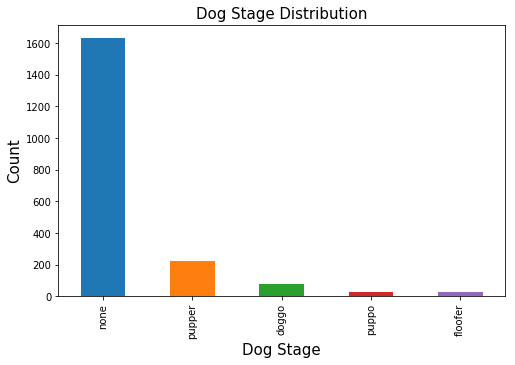

In [105]:
combined.dog_stage.value_counts().plot(kind = 'bar', figsize=(8,5))
plt.title('Dog Stage Distribution', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)

Text(0,0.5,'Average Rating')

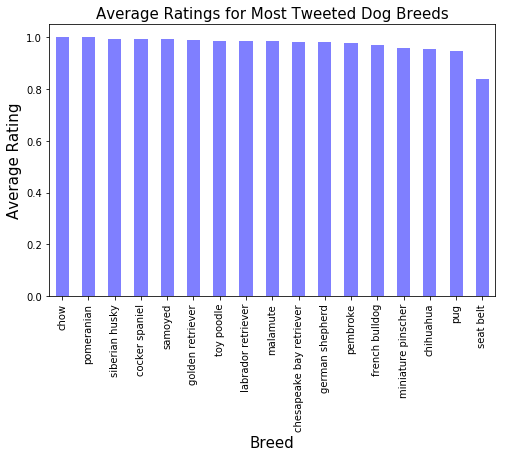

In [106]:
breeds=combined.groupby('predictions').filter(lambda x: 200 > len(x) > 19)

breeds.groupby('predictions')['rating'].mean().sort_values(ascending=False).plot(kind ='bar', color = 'Blue', alpha=0.5,figsize=(8,5))
plt.title('Average Ratings for Most Tweeted Dog Breeds', fontsize=15)
plt.xlabel('Breed', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)

Text(0,0.5,'Average favorite counts')

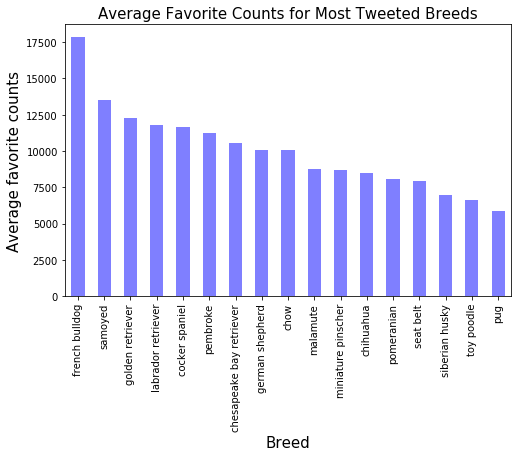

In [107]:
breeds.groupby('predictions')['favorites'].mean().sort_values(ascending=False).plot(kind ='bar', color = 'Blue', alpha=0.5, figsize=(8,5))
plt.title('Average Favorite Counts for Most Tweeted Breeds', fontsize=15)
plt.xlabel('Breed', fontsize=15)
plt.ylabel('Average favorite counts', fontsize=15)

Text(0,0.5,'Average retweet counts')

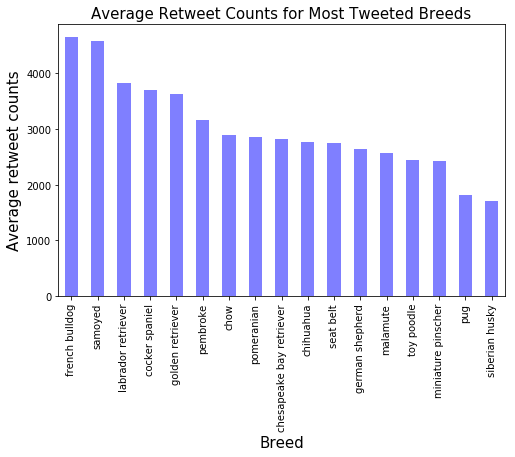

In [108]:
breeds.groupby('predictions')['retweets'].mean().sort_values(ascending=False).plot(kind ='bar', color = 'Blue', alpha=0.5, figsize=(8,5))
plt.title('Average Retweet Counts for Most Tweeted Breeds', fontsize=15)
plt.xlabel('Breed', fontsize=15)
plt.ylabel('Average retweet counts', fontsize=15)